In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Titanic1.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

In [4]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     888 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Categorical column :

Name

Sex

Embarked

# Numerical column :

Age

Fare

passenger id

Pclass

SibSp

Parch

# Mixed Column :
Ticket,
cabin

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         3
dtype: int64

In [8]:
# Missing value in Age,Cabin and Embarked
# More than 70% missing value in Cabin. we will have to drop it.
# few columns have inappropriate datatypes.

In [9]:
# Dropping Cabin column
df.drop(['Cabin'],inplace=True,axis=1)

In [10]:
# imputing missing value
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [11]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [12]:
# imputing missing value for Embarked
df['Embarked'].fillna('S',inplace=True)

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [15]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [17]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [18]:
df['SibSp'].unique()


array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [19]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
# five point summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

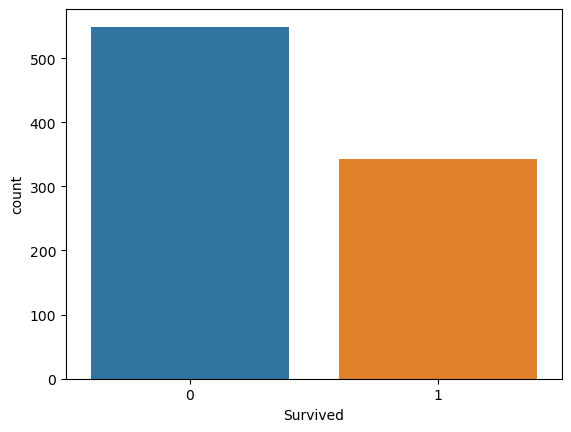

In [23]:
# univariant analysis
sns.countplot(df['Survived'])

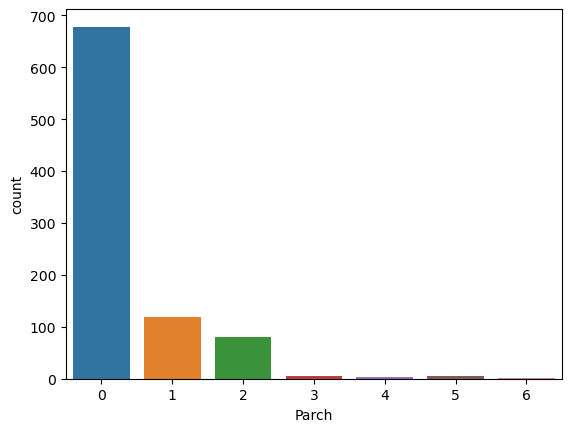

In [24]:
sns.countplot(df['Parch'])
plt.show()

we have see no. of people are more who are travelling alone

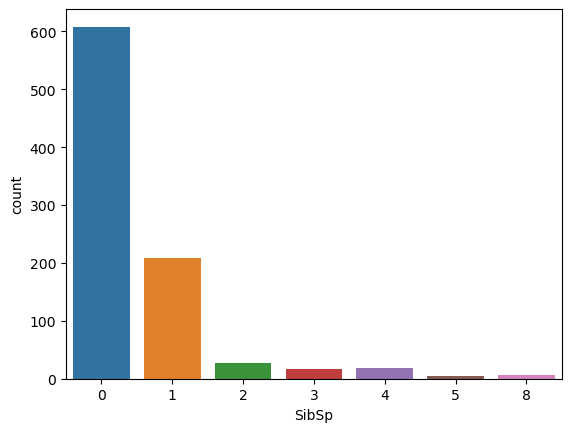

In [25]:
sns.countplot(df['SibSp'])
plt.show()

we can see that those people are more who are travelling without sibling or spouse

conclusion:- large no. of people travelling alone

male      577
female    314
Name: Sex, dtype: int64


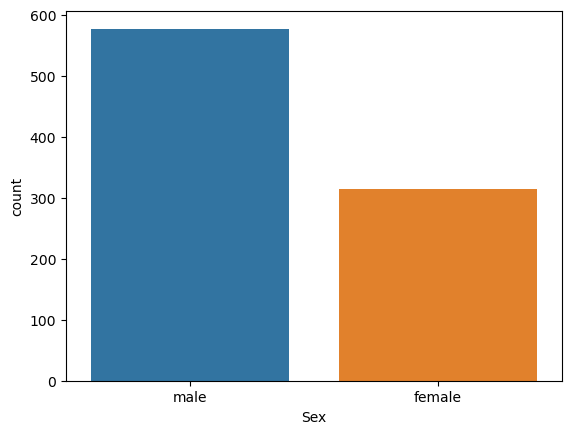

In [26]:
print(df['Sex'].value_counts())
sns.countplot(df["Sex"])
plt.show()

we can see that population of male is larger than female

3    491
1    216
2    184
Name: Pclass, dtype: int64


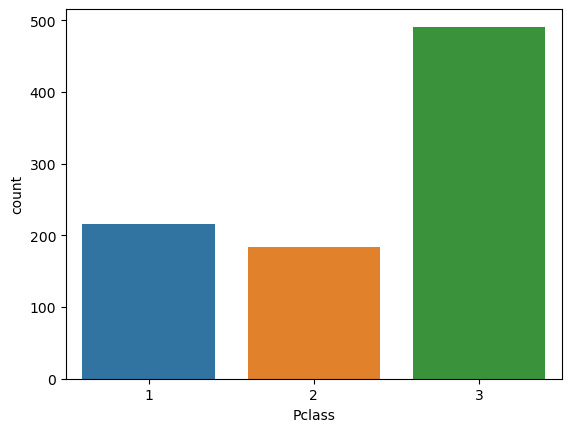

In [27]:
print(df['Pclass'].value_counts())
sns.countplot(df['Pclass'])
plt.show()

conculusion:- 1st and 2nd class Almost are equal but 3rd class are most populated other than

S    647
C    168
Q     76
Name: Embarked, dtype: int64


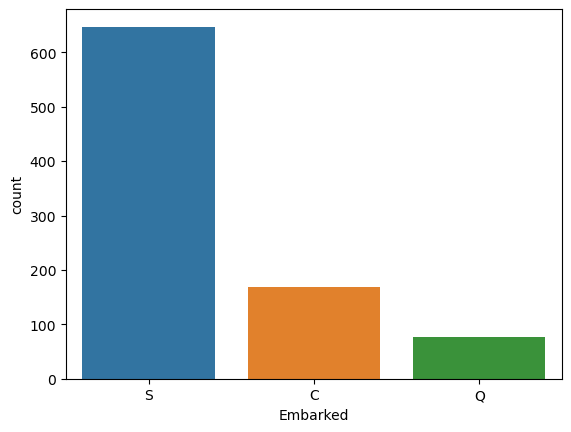

In [28]:
print(df['Embarked'].value_counts())
sns.countplot(df['Embarked'])
plt.show()

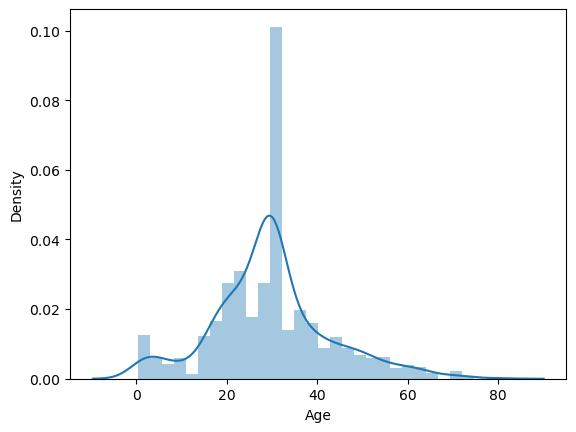

0.4344880940129925


In [29]:
#Age column
sns.distplot(df['Age'])
plt.show()
print(df['Age'].skew())

data distribution is normal because skewness is between +0.5 to -0.5 is normal distribution

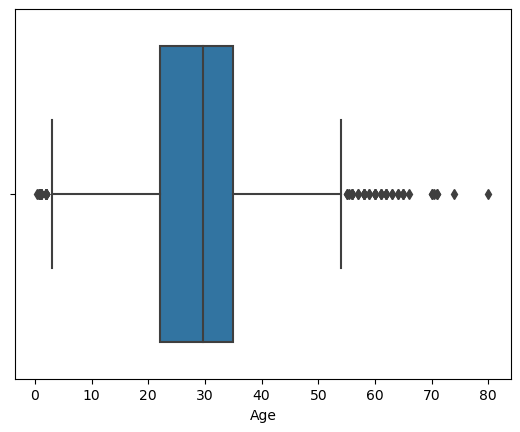

In [30]:
sns.boxplot(df['Age'])
plt.show()

probability of some outliers are there

4.787316519674893


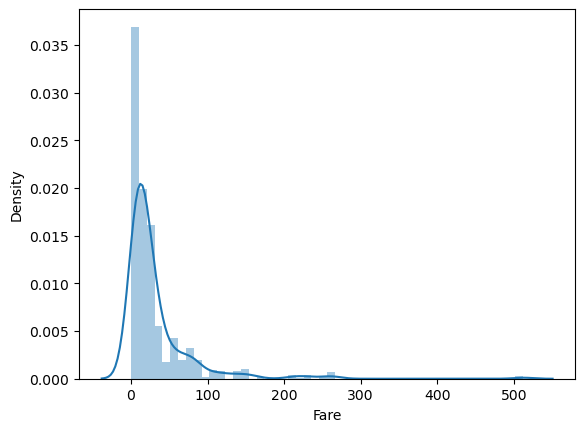

In [31]:
print(df['Fare'].skew())
sns.distplot(df['Fare'])
plt.show()

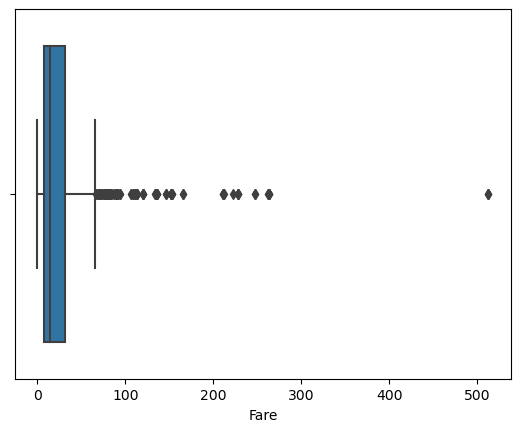

In [32]:
sns.boxplot(df['Fare'])
plt.show()

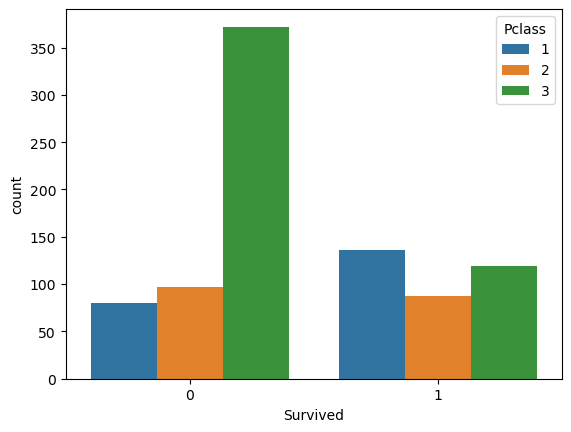

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [33]:
# Multivariate Analysis
# Survival with Pclass
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.show()
pd.crosstab(df['Pclass'],df['Survived'])

from the 3rd class most of the people died

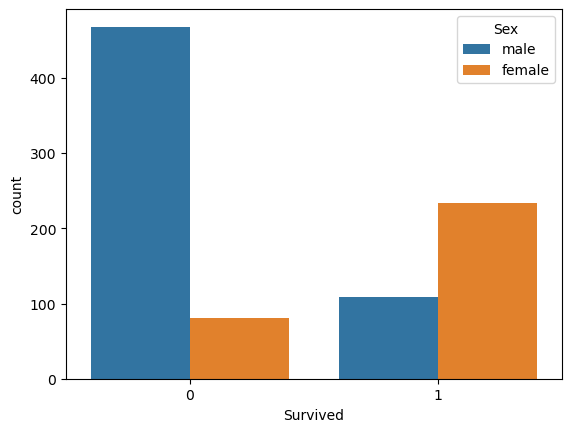

Survived,0,1
Sex,,
female,81,233
male,468,109


In [34]:
sns.countplot(df['Survived'],hue=df['Sex'])
plt.show()
pd.crosstab(df['Sex'],df['Survived'])

we can see that male had died more than Female

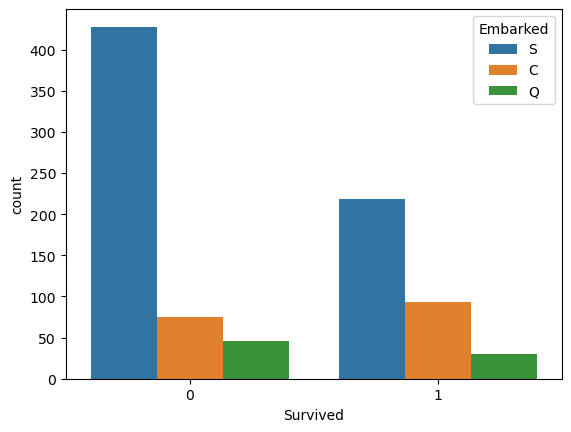

Survived,0,1
Embarked,,
C,75,93
Q,46,30
S,428,219


In [35]:
sns.countplot(x='Survived',hue='Embarked',data=df)
plt.show()
pd.crosstab(df['Embarked'],df['Survived'])


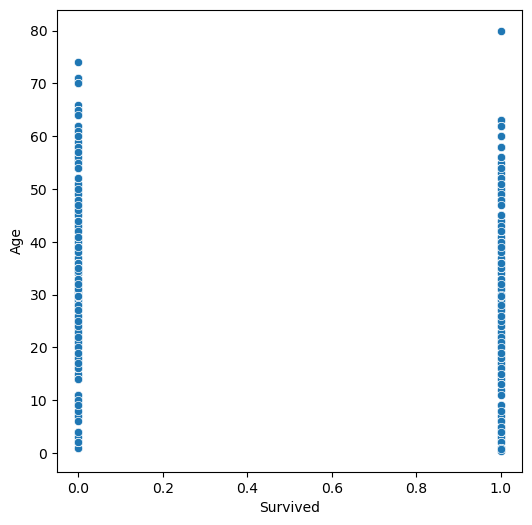

In [36]:
# survived with age:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Survived',y='Age',data=df)
plt.show()


<AxesSubplot:xlabel='Survived', ylabel='count'>

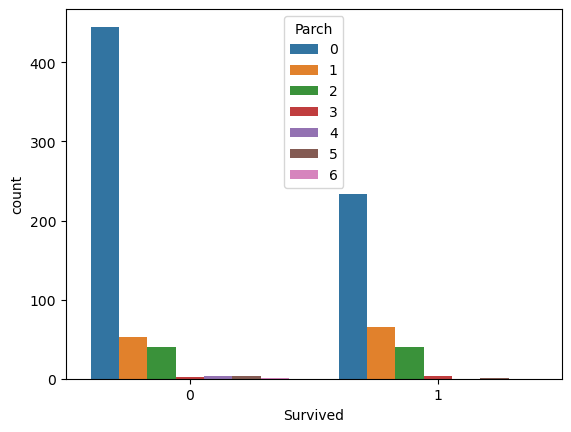

In [37]:
sns.countplot(df['Survived'],hue=df['Parch'])

In [38]:
who are travelled alone they died more also same for sibling spouse


No variables match your requested type.


<AxesSubplot:xlabel='Survived', ylabel='count'>

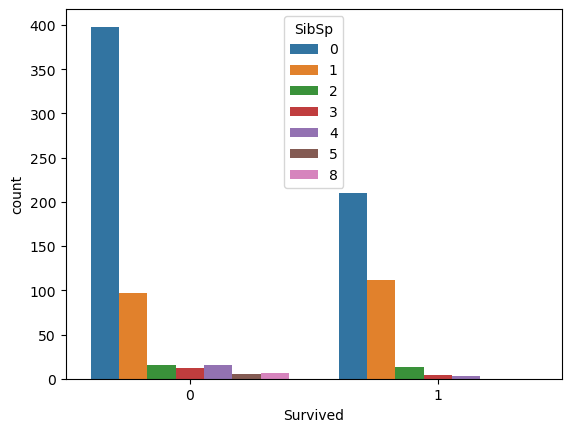

In [39]:
sns.countplot(df['Survived'],hue=df['SibSp'])

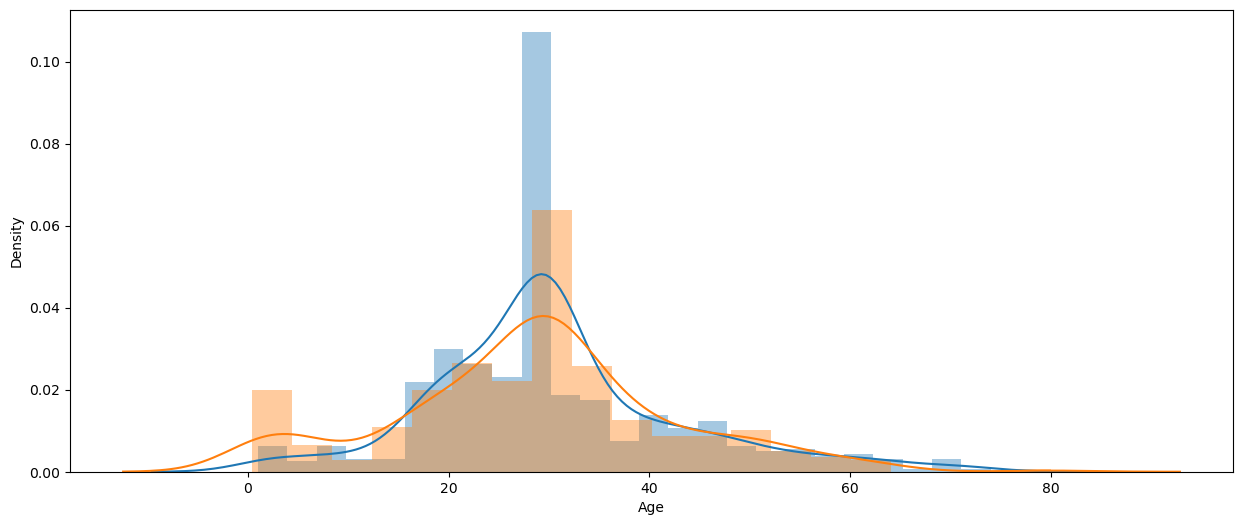

In [40]:
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])
plt.show()

from the graph we see that from o to 7  means children were not more die

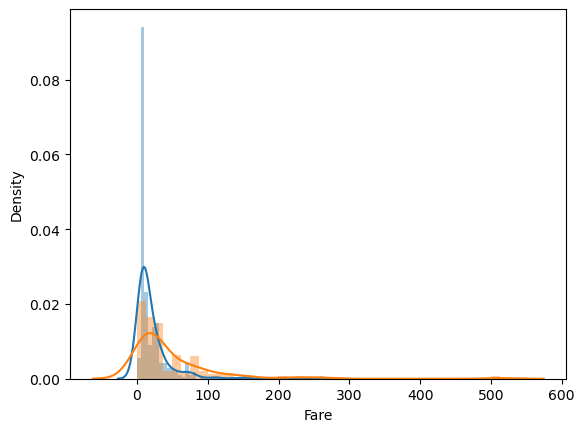

In [41]:
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])
plt.show()

we see that low fare peoples have more died

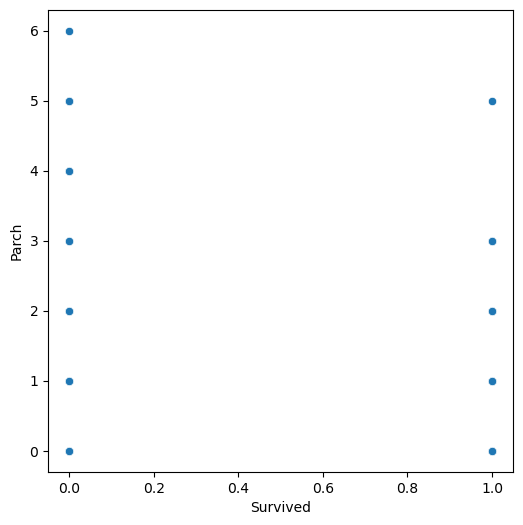

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [42]:
plt.figure(figsize=(6,6))
sns.scatterplot(df['Survived'],df['Parch'])
plt.show()
pd.crosstab(df['Parch'],df['Survived'])

In [43]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [44]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<AxesSubplot:>

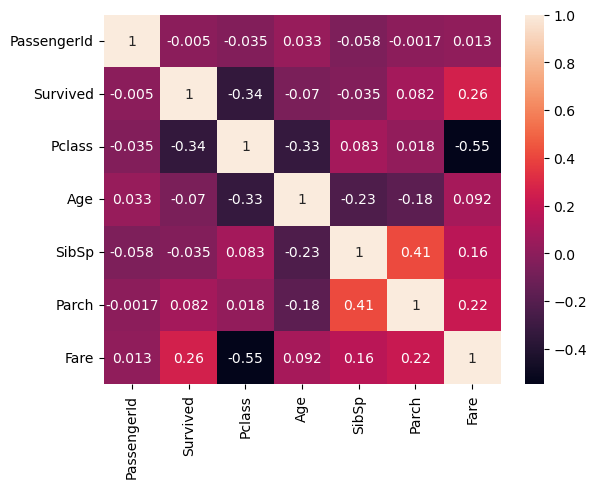

In [45]:
sns.heatmap(df.corr(),annot=True)

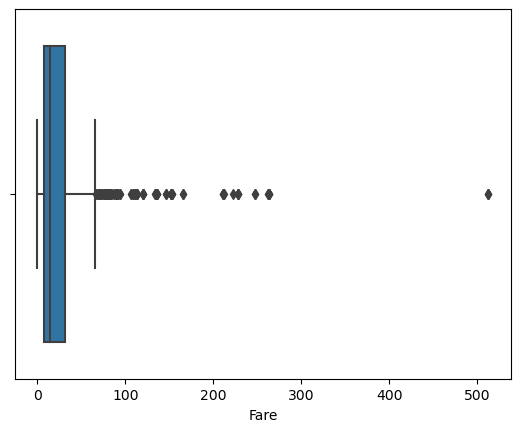

In [46]:
sns.boxplot(df['Fare'])
plt.show()

In [47]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

Fare is showing high skeness

In [48]:
from scipy import stats
from scipy.stats import boxcox

In [49]:
#Removing skewness
df['Fare']=boxcox(df['Fare'],0)

In [50]:
# we can see that sibsp and parch creating very highly correlated to each other
#and it became difficult with sibsp with parch vs survived
# we creating a new column by merging them
df['Family']=df['Parch']+df['SibSp']

In [51]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C,1


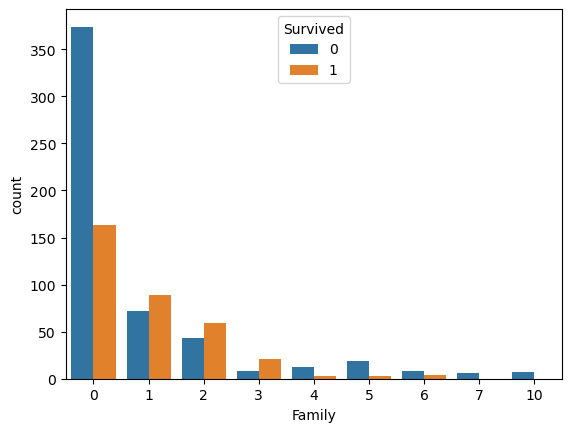

In [52]:
sns.countplot(df['Family'],hue=df['Survived'])
plt.show()

In [53]:
# now dropping column sibsp ,parch,passengerid,ticket,name
df.drop(['PassengerId'],axis=1,inplace=True)

In [54]:
df.drop(['SibSp'],axis=1,inplace=True)
df.drop(['Parch'],axis=1,inplace=True)
df.drop(['Ticket'],axis=1,inplace=True)
df.drop(['Name'],axis=1,inplace=True)

In [55]:
# Encoding 
#Embarked,Sex
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])


if the data is following normal distribution,anything beyond 3SD-mean+3SD can be considere as outlier

if the data does not following normal distribution using boxplot we can eliminate points beyond Q1-1.5IQR and Q3+1.5IQR

In [56]:
# handling outliers in age
df=df[df['Age']<(df['Age'].mean()+3*df['Age'].std())]
df.shape

(884, 7)

In [57]:
# handling outliers from fare column
# finding Quartile
Q1=np.percentile(df['Fare'],25)
Q3=np.percentile(df['Fare'],75)

outliers_low=Q1-1.5*(Q3-Q1)
outliers_high=Q1+1.5*(Q3-Q1)

df=df[(df['Fare']>outliers_low)&(df['Fare']<outliers_high)]

In [58]:
df.shape



(749, 7)

In [59]:
#split into x and y
x=df.drop(['Survived'],axis=1)
x

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,1,22.000000,1.981001,2,1
2,3,0,26.000000,2.070022,2,0
3,1,0,35.000000,3.972177,2,1
4,3,1,35.000000,2.085672,2,0
5,3,1,29.699118,2.135148,1,0
...,...,...,...,...,...,...
886,2,1,27.000000,2.564949,2,0
887,1,0,19.000000,3.401197,2,0
888,3,0,29.699118,3.154870,2,3
889,1,1,26.000000,3.401197,0,0


In [60]:
y=df['Survived']
y

0      0
2      1
3      1
4      0
5      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 749, dtype: int64

In [61]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [62]:
x=st.fit_transform(x)
x

array([[ 0.68895741,  0.69088172, -0.54083933, -1.06477858,  0.53840723,
         0.14474847],
       [ 0.68895741, -1.44742576, -0.21325765, -0.92541053,  0.53840723,
        -0.5547135 ],
       [-2.08539259, -1.44742576,  0.52380112,  2.05253867,  0.53840723,
         0.14474847],
       ...,
       [ 0.68895741, -1.44742576,  0.08968314,  0.77299124,  0.53840723,
         1.54367241],
       [-2.08539259,  0.69088172, -0.21325765,  1.15863232, -2.19560644,
        -0.5547135 ],
       [ 0.68895741,  0.69088172,  0.27811486, -0.96036881,  0.53840723,
        -0.5547135 ]])

In [63]:
# splitting variable into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [64]:
x_train

array([[ 0.68895741,  0.69088172,  0.08968314,  0.09891092, -2.19560644,
         0.84421044],
       [-0.69821759,  0.69088172,  1.09706905, -0.15056943,  0.53840723,
        -0.5547135 ],
       [ 0.68895741,  0.69088172,  0.08968314,  0.65006733, -2.19560644,
         0.84421044],
       ...,
       [-0.69821759, -1.44742576,  0.11432402, -0.23087248, -0.82859961,
        -0.5547135 ],
       [-0.69821759, -1.44742576,  0.60569654,  0.93459846,  0.53840723,
         0.14474847],
       [ 0.68895741,  0.69088172, -0.62273475, -0.92541053,  0.53840723,
        -0.5547135 ]])

In [65]:
y_train


709    1
149    0
48     0
79     1
800    0
      ..
80     0
122    0
322    1
518    1
115    0
Name: Survived, Length: 599, dtype: int64

In [66]:
print(x_train.shape),print(y_train.shape),print(x_test.shape),print(y_test.shape)

(599, 6)
(599,)
(150, 6)
(150,)


(None, None, None, None)

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
#Apply Lasso and Ridge
from sklearn.linear_model import Lasso,Ridge
L1=Lasso()
L2=Ridge()

In [69]:
dict1={'alpha':[.0001,.001,.01,.1,1]}

In [70]:
estimators={'model':[L1,L2]}

In [71]:
gsv=GridSearchCV(estimator=L1,param_grid=dict1)
gsv.fit(x_train,y_train)
print(gsv.best_params_)
print("best_score:", gsv.best_score_)
print("best_estimatore:", gsv.best_estimator_.alpha)

{'alpha': 0.0001}
best_score: 0.3058203491107686
best_estimatore: 0.0001


In [72]:
gsv=GridSearchCV(estimator=L2,param_grid=dict1)
gsv.fit(x_train,y_train)
print(gsv.best_params_)
print("best_score:", gsv.best_score_)
print("best_estimator:", gsv.best_estimator_.alpha)

{'alpha': 1}
best_score: 0.30592128711669425
best_estimator: 1


In [73]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
lg=LogisticRegression()

In [77]:
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,predlg)*100)
print("confusion matrix:",confusion_matrix(y_test,predlg))
print("classification_report:",classification_report(y_test,predlg))

print("precision_score of lg :", precision_score(y_test,predlg)*100)
print("recall_score of lg :", recall_score(y_test,predlg)*100)
print("f1_score of lg:", f1_score(y_test,predlg)*100)


Accuracy score: 80.0
confusion matrix: [[85  8]
 [22 35]]
classification_report:               precision    recall  f1-score   support

           0       0.79      0.91      0.85        93
           1       0.81      0.61      0.70        57

    accuracy                           0.80       150
   macro avg       0.80      0.76      0.78       150
weighted avg       0.80      0.80      0.79       150

precision_score of lg : 81.3953488372093
recall_score of lg : 61.40350877192983
f1_score of lg: 70.0


In [78]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [79]:
y_pred_prob=lg.predict_proba(x_test)[:,1]


In [80]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

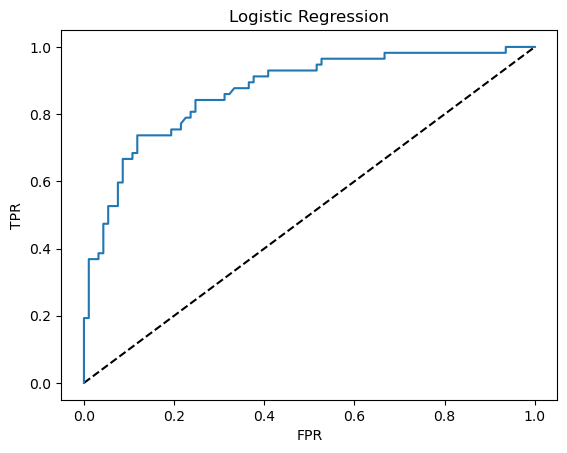

In [81]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Logistic Regression')
plt.show()

auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [83]:
knn=KNeighborsClassifier()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
svc=SVC()

In [84]:
parameters={'kernel':['rbf','poly','linear'],'C':[1,10]}
gsv=GridSearchCV(estimator=svc,param_grid=parameters)
gsv.fit(x_train,y_train)
print('best parameter:', gsv.best_params_)
print('best score:', gsv.best_score_)
print('best estimator:', gsv.best_estimator_)

best parameter: {'C': 1, 'kernel': 'rbf'}
best score: 0.8080392156862745
best estimator: SVC(C=1)


by hyper parametric tunning 'rbf' is best parameter

In [85]:
svc=SVC(kernel='rbf',C=1)
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy_Score :", accuracy_score(y_test,predsvc)*100)
print("confusion_matrix :", confusion_matrix(y_test,predsvc)*100)
print("classification_report :", classification_report(y_test,predsvc))

print("precision_score of svc :", precision_score(y_test,predsvc)*100)
print("recall_score of svc :", recall_score(y_test,predsvc)*100)
print("f1_score of svc :", f1_score(y_test,predsvc)*100)


Accuracy_Score : 80.66666666666666
confusion_matrix : [[8800  500]
 [2400 3300]]
classification_report :               precision    recall  f1-score   support

           0       0.79      0.95      0.86        93
           1       0.87      0.58      0.69        57

    accuracy                           0.81       150
   macro avg       0.83      0.76      0.78       150
weighted avg       0.82      0.81      0.80       150

precision_score of svc : 86.8421052631579
recall_score of svc : 57.89473684210527
f1_score of svc : 69.47368421052632


In [86]:
models=[knn,dtc,gnb,]
for m in models:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy_score of", m,":", accuracy_score(y_test,predm)*100)
    print("confusion_matrix",m,":", confusion_matrix(y_test,predm))
    print("classification_report",'m',':', classification_report(y_test,predm))
    
    print("precision_score of", m,":", precision_score(y_test,predm)*100)
    print("recall_score of ", m,":", recall_score(y_test,predm)*100)
    print("f1_score of ",m,":",  f1_score(y_test,predm)*100)


Accuracy_score of KNeighborsClassifier() : 82.0
confusion_matrix KNeighborsClassifier() : [[87  6]
 [21 36]]
classification_report m :               precision    recall  f1-score   support

           0       0.81      0.94      0.87        93
           1       0.86      0.63      0.73        57

    accuracy                           0.82       150
   macro avg       0.83      0.78      0.80       150
weighted avg       0.83      0.82      0.81       150

precision_score of KNeighborsClassifier() : 85.71428571428571
recall_score of  KNeighborsClassifier() : 63.1578947368421
f1_score of  KNeighborsClassifier() : 72.72727272727273
Accuracy_score of DecisionTreeClassifier() : 78.0
confusion_matrix DecisionTreeClassifier() : [[77 16]
 [17 40]]
classification_report m :               precision    recall  f1-score   support

           0       0.82      0.83      0.82        93
           1       0.71      0.70      0.71        57

    accuracy                           0.78       150
   m

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy_score of rf :", accuracy_score(y_test,predrf)*100)
print("confusion_matrix :", confusion_matrix(y_test,predrf))
print("classification_report :", classification_report(y_test,predrf))

print("precision_score of rf :", precision_score(y_test,predrf)*100)
print("recall_score of rf :", recall_score(y_test,predrf)*100)
print("f1_score of rf :", f1_score(y_test,predrf)*100)


Accuracy_score of rf : 80.0
confusion_matrix : [[78 15]
 [15 42]]
classification_report :               precision    recall  f1-score   support

           0       0.84      0.84      0.84        93
           1       0.74      0.74      0.74        57

    accuracy                           0.80       150
   macro avg       0.79      0.79      0.79       150
weighted avg       0.80      0.80      0.80       150

precision_score of rf : 73.68421052631578
recall_score of rf : 73.68421052631578
f1_score of rf : 73.68421052631578


In [89]:
from sklearn.ensemble import GradientBoostingClassifier


In [90]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print("Accuracy_score of gb :", accuracy_score(y_test,predgb)*100)
print("confusion_matrix :", confusion_matrix(y_test,predgb))
print("classification_report :", classification_report(y_test,predgb))

print("precision_score of rf :", precision_score(y_test,predgb)*100)
print("recall_score of rf :", recall_score(y_test,predgb)*100)
print("f1_score of rf :", f1_score(y_test,predgb)*100)


Accuracy_score of gb : 80.66666666666666
confusion_matrix : [[83 10]
 [19 38]]
classification_report :               precision    recall  f1-score   support

           0       0.81      0.89      0.85        93
           1       0.79      0.67      0.72        57

    accuracy                           0.81       150
   macro avg       0.80      0.78      0.79       150
weighted avg       0.81      0.81      0.80       150

precision_score of rf : 79.16666666666666
recall_score of rf : 66.66666666666666
f1_score of rf : 72.38095238095237


In [91]:
from sklearn.model_selection import cross_val_score

In [92]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.76666667 0.76666667 0.84666667 0.84       0.81879195]
0.8077583892617449
0.03479130416177637


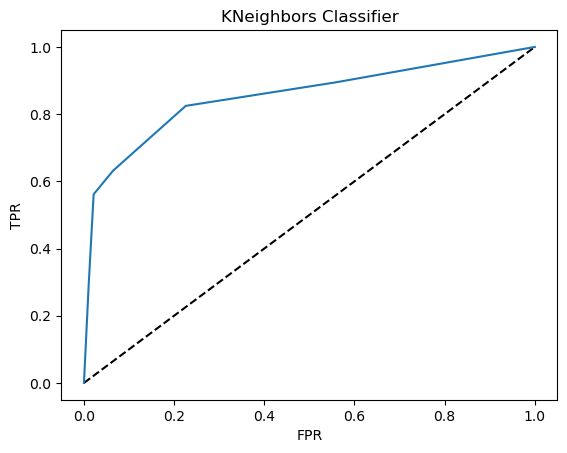

In [93]:
y_pred_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighbors Classifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('KNeighbors Classifier')
plt.show()

auc_score=roc_auc_score(y_test,knn.predict(x_test))

from the above model knn is the best model for titanic data

its accuracy is high from the among model

its accuracy is -->82.0%

its precision score is-->85%




In [94]:
# save model KNeighborsClassifier
import pickle
filename='KNeighborsClassifier.pkl'
pickle.dump(knn,open(filename,'wb'))

load_model=pickle.load(open(filename,'rb'))
load_model.predict(x_test)

result=load_model.score(x_test,y_test)
print(result*100)


82.0


In [95]:
result=pd.DataFrame([load_model.predict(x_test)[:],(y_test)[:]],index=["Predicted","Original"])
result                    

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
Predicted,0,1,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,1
Original,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
